## Session 27 - Inferential Statistics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Central Limit Theorem Example : Rolling a Dice

In [2]:
data_dice = {'Number': [1,2,3,4,5,6], 'Prob': [1/6,1/6,1/6,1/6,1/6,1/6]}
dice = pd.DataFrame(data_dice)
dice

,Number,Prob
0,1,0.166667
1,2,0.166667
2,3,0.166667
3,4,0.166667
4,5,0.166667
5,6,0.166667


In [3]:
np.sum(dice['Number']*dice['Prob'])

3.5

In [4]:
dice.sample(5, replace=True, random_state=13)['Number'].mean()

2.2

<AxesSubplot:>

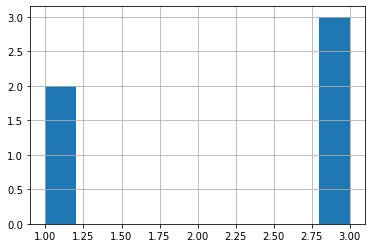

In [5]:
dice.sample(5, replace=True, random_state=13)['Number'].hist()

In [6]:
dice.sample(10, replace=True, random_state=13)['Number'].mean()

3.0

<AxesSubplot:>

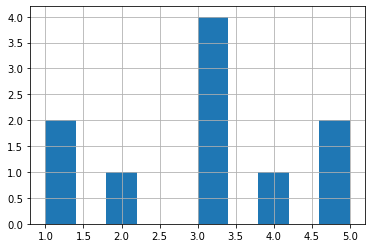

In [7]:
dice.sample(10, replace=True, random_state=13)['Number'].hist()

In [8]:
dice.sample(100, replace=True, random_state=13)['Number'].mean()

3.6

<AxesSubplot:>

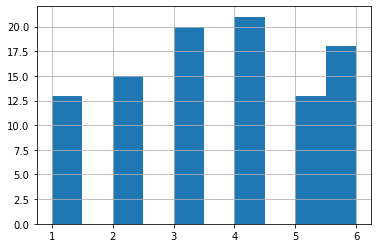

In [9]:
dice.sample(100, replace=True, random_state=13)['Number'].hist()

In [10]:
dice.sample(1000, replace=True, random_state=13)['Number'].mean()

3.497

<AxesSubplot:>

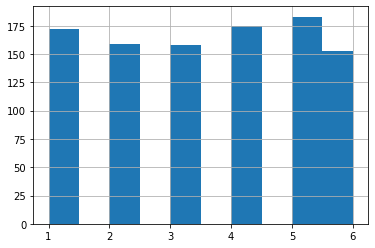

In [11]:
dice.sample(1000, replace=True, random_state=13)['Number'].hist()

### Tips dataset

In [12]:
data = sns.load_dataset('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
data.shape

(244, 7)

### Sampling using Slovin's Sample Size Method

In [14]:
N = 244
e = 0.05
slovin = N/(1+N*e**2)
slovin

151.5527950310559

In [ ]:
def slovin_formula(N, e):
    return round(N/(1 + N * e**2))

In [ ]:
slovin_formula(len(data),0.05)

In [15]:
# Simple Random Sampling mengikuti hasil Slovin's Sample Size
data_sample = data.sample(n=152)

In [16]:
data_sample.head()

,total_bill,tip,sex,smoker,day,time,size
142,41.19,5.00,Male,No,Thur,Lunch,5
208,24.27,2.03,Male,Yes,Sat,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
51,10.29,2.60,Female,No,Sun,Dinner,2
229,22.12,2.88,Female,Yes,Sat,Dinner,2


In [17]:
# proportions sampled
152/244

0.6229508196721312

In [ ]:
# Sampling 50%
data.sample(frac=0.5, random_state=24)

In [18]:
data.groupby(['smoker'], as_index=False).count()

,smoker,total_bill,tip,sex,day,time,size
0,Yes,93,93,93,93,93,93
1,No,151,151,151,151,151,151


In [ ]:
244/2

In [20]:
# Stratified Sampling
# For equal number of data for each category
strat_data = data.groupby(['smoker'], group_keys=False).apply(lambda x: x.sample(n=80, random_state=24))

In [21]:
strat_data.groupby(['smoker'], as_index=False).count()

,smoker,total_bill,tip,sex,day,time,size
0,Yes,80,80,80,80,80,80
1,No,80,80,80,80,80,80


### Confidence Interval

In [22]:
data['tip'].mean()

2.9982786885245902

In [23]:
data_sample['tip'].mean()

3.0319078947368427

In [24]:
strat_data['tip'].mean()

2.9730000000000008

**For Slovin's Sampling**

In [25]:
from scipy import stats
import math

# Sample size
n = len(data_sample)
# Population standard deviation
sigma = data['tip'].std()
# Sample mean
x_bar = data_sample['tip'].mean()
# confidence level
c = 95/100
p = 1 - (1 - c)/2

zc = stats.norm.ppf(p)
E = zc * sigma / math.sqrt(n)
print('p :', p)
print('E :', E)
# 95% Confidence Interval (95% CI)
print(f'95% confidence interval: from {x_bar-E} to {x_bar+E}')

p : 0.975
E : 0.21996259634495793
95% confidence interval: from 2.8119452983918847 to 3.251870491081801


**For Stratified Sampling**

In [26]:
from scipy import stats
import math

# Sample size
n = len(strat_data)
# Population standard deviation
sigma = data['tip'].std()
# Sample mean
x_bar = strat_data['tip'].mean()

c = 95/100
p = 1 - (1 - c)/2

zc = stats.norm.ppf(p)
E = zc * sigma / math.sqrt(n)
print(E)

print(f'interval: from {x_bar-E} to {x_bar+E}')

0.21439301901245328
interval: from 2.7586069809875475 to 3.187393019012454


##### Example (Population variance unknown)

- You randomly select $36$ cars of the same model that were sold at a car dealership and determine the number of days each car sat on the dealership’s lot before it was sold. 
- The sample mean is $9.75$ days, with a sample standard deviation of $2.39$ days. 
- Construct a $99\%$ confidence interval for the population mean number of days the car model sits on the dealership’s lot.

In [29]:
from scipy.stats import t
from math import sqrt

n = 36
df = n - 1
c = 99/100
s = 2.39
x_bar = 9.75

p = 1 - ((1-c)/2)
# find t_c
tc = t.ppf(p, df)
print(f'tc: {tc}')

E = tc * s / sqrt(n)
print(f'P: {p}')
print(f'E: {E}')

print(f'Left End Point: {x_bar - E}', '', f'Right End Point: {x_bar + E}')

tc: 2.723805589208047
P: 0.995
E: 1.0849825597012053
Left End Point: 8.665017440298795  Right End Point: 10.834982559701205


- Because $\sigma$ is unknown, the sample is random, and $n \ge 30$, use the $t$-distribution. 
- Using $n = 36$, $\bar{x} = 9.75$, $s = 2.39$, $c = 0.99$, and $d.f. = 35$, we can use Table to find that $t_{c} = 2.724$. 
- The margin of error at the $99\%$ confidence level is:
 - $E = t_{c} \frac{s}{\sqrt{n}} = 2.724 \times \frac{2.39}{\sqrt{36}} \approx 1.09$


**With $99\%$ confidence, we can say that the population mean number of days the car model sits on the dealership’s lot is between $8.66$ and $10.84$.**

### Hypothesis Testing

#### One sample t-test

scipy.stats.ttest_1samp(a, popmean, axis=0, nan_policy='propagate', alternative='two-sided')

---

Calculate the T-test for the mean of ONE group of scores.

This is a two-sided test for the null hypothesis that the expected value (mean) of a sample of independent observations a is equal to the given population mean, popmean.

**Membuat statement hipotesa**

H0 : rata-rata 'tip' dari sampel **sama dengan** rata-rata 'tip' populasi

H1 : rata-rata 'tip' dari sampel **tidak sama dengan** rata-rata 'tip' populasi

In [31]:
import scipy.stats as st

In [32]:
ttest_1 = st.ttest_1samp(a=data_sample['tip'], popmean=data['tip'].mean())
print('P-Value :', ttest_1.pvalue)

P-Value : 0.7674129938037579


In [ ]:
if ttest_1.pvalue >= 0.05:
    print('Tidak cukup bukti untuk menentang pernyataan bahwa rata-rata nilai "tip" dari data_sample tidak berbeda dengan rata-rata "tip" populasi')
else:
    print('Cukup bukti untuk menentang pernyataan bahwa rata-rata nilai "tip" dari data_sample tidak berbeda dengan rata-rata "tip" populasi')